# **Chapter 1 – The Machine Learning landscape**

_This notebook contains the code examples in chapter 1. You'll also find the exercise solutions at the end of the notebook. The rest of this notebook is used to generate `lifesat.csv` from the original data sources, and some of this chapter's figures._

You're welcome to go through the code in this notebook if you want, but the real action starts in the next chapter..

## Imports and Setups


In [58]:
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing
from sklearn import pipeline

Let's define the default font sizes, to plot pretty figures:

In [2]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Get Data

In [3]:
data_root = "https://github.com/ageron/data/raw/main/"

df = pd.read_csv(f"{data_root}lifesat/lifesat.csv")

In [4]:
X = df[["GDP per capita (USD)"]].values
y = df[["Life satisfaction"]].values


## Explore and Visualise Data

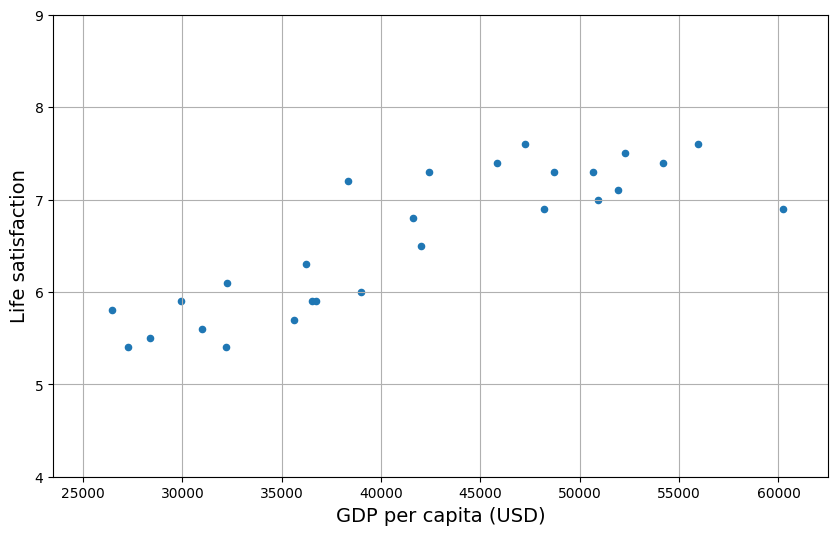

Linear Regression:: X:[[37655.2]] y_pred:[[6.30165767]]
KNN:: X:[[37655.2]] y_pred:[[6.33333333]]


In [5]:
df.plot(kind='scatter', figsize=(10, 6), grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Linear Regression
model = LinearRegression()
model.fit(X, y)

X_new = [[37_655.2]]
print(f'Linear Regression:: X:{X_new} y_pred:{model.predict(X_new)}')

# KNN
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)

X_new = [[37_655.2]]
print(f'KNN:: X:{X_new} y_pred:{model.predict(X_new)}')

## Load and prepare Life satisfaction data

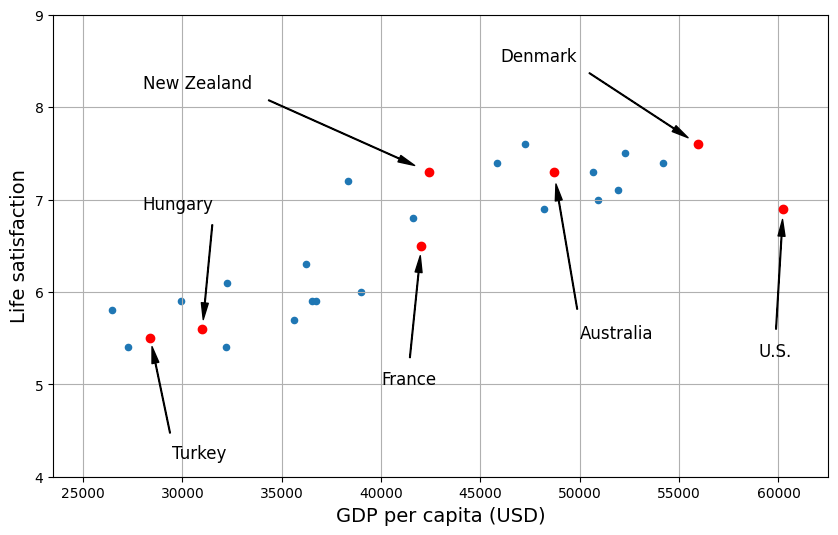

In [6]:
min_life_sat = 4
max_life_sat = 9
min_gdp = 23_500
max_gdp = 62_500

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

df.plot(kind='scatter', figsize=(10, 6), grid=True, x='GDP per capita (USD)', y='Life satisfaction')

for country, pos_text in position_text.items():
  pos_data_x = df.loc[df.Country == country]['GDP per capita (USD)']
  pos_data_y = df.loc[df.Country == country]['Life satisfaction']
  country = "U.S." if country == "United States" else country

  plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))

  plt.plot(pos_data_x, pos_data_y, "ro")


plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [7]:
X_sample = df[['GDP per capita (USD)']].values
y_sample = df[['Life satisfaction']].values

lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


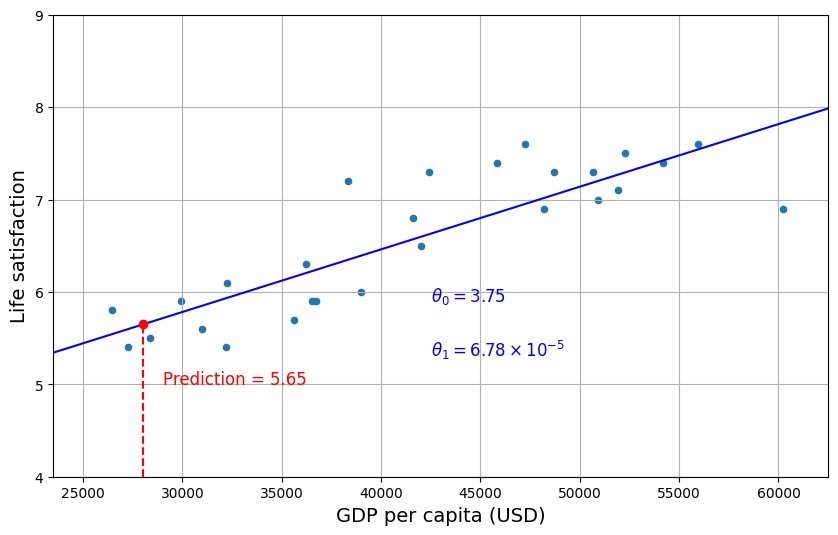

In [8]:
df.plot(kind='scatter', figsize=(10, 6), grid=True, x='GDP per capita (USD)', y='Life satisfaction')

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t1 * X + t0, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

cyprus_gdp = 28_036.19
cyprus_life_sat_pred = lin1.predict(np.array([[cyprus_gdp]]))[0][0]

plt.plot([cyprus_gdp, cyprus_gdp],
         [min_life_sat, cyprus_life_sat_pred], "r--")
plt.text(cyprus_gdp + 1000, 5.0, f"Prediction = {cyprus_life_sat_pred:.2f}", color="r")
plt.plot(cyprus_gdp, cyprus_life_sat_pred, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [9]:
position_text_missing_countries = {
    # "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 4.7,),
    "Brazil": (18_000, 5.2),
    "Mexico": (24_000, 5.7),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 7.4),
    "Ireland": (81_000, 7.8),
    "Luxembourg": (92_000, 8.2),
}

In [43]:
X_missing = np.array([item[0] for key, item in position_text_missing_countries.items()]).reshape(-1,)
y_missing = np.array([item[1] for key, item in position_text_missing_countries.items()]).reshape(-1,)

(35, 1)
(35, 1)


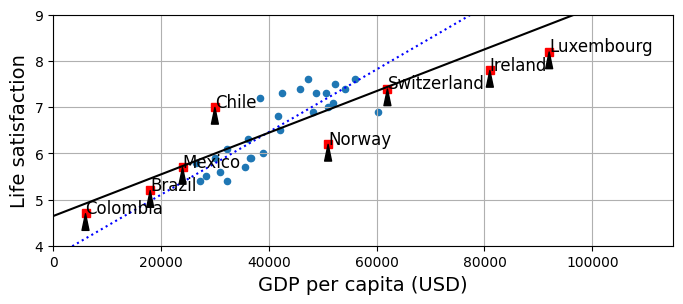

In [46]:
df.plot(kind='scatter', figsize=(8, 3), grid=True, x='GDP per capita (USD)', y='Life satisfaction')

for missing_country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y =  pos_text[0], pos_text[1]
    plt.annotate(missing_country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")


lin_reg_full = LinearRegression()
Xfull = np.concatenate((df['GDP per capita (USD)'], X_missing)).reshape(-1, 1)
yfull =  np.concatenate((df['Life satisfaction'], y_missing)).reshape(-1, 1)
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()

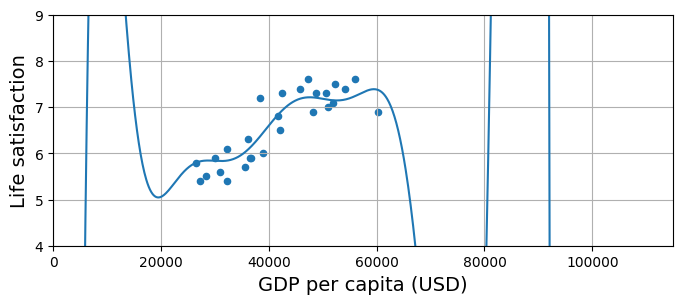

In [53]:
df.plot(kind='scatter', figsize=(8, 3), grid=True, x='GDP per capita (USD)', y='Life satisfaction')

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)
])

pipeline_reg.fit(Xfull, yfull)

curve = pipeline_reg.predict(X[:, np.newaxis])

plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])

plt.show()

5.347511088430103
[2.93316397e-05]


<ipython-input-61-ee01562830ec>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ridge.fit(df['GDP per capita (USD)'][:, np.newaxis], df['Life satisfaction'])


IndexError: ignored

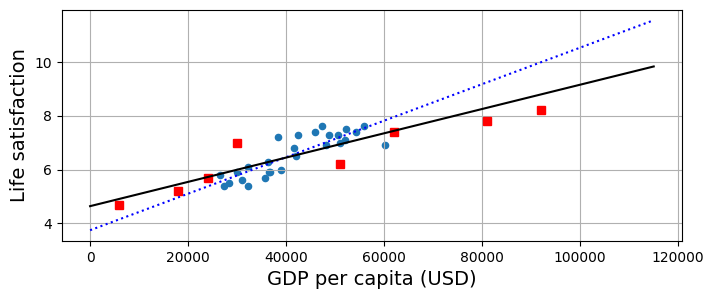

In [61]:
from sklearn import linear_model
df.plot(kind='scatter', figsize=(8, 3), grid=True, x='GDP per capita (USD)', y='Life satisfaction')

for missing_country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y =  pos_text[0], pos_text[1]
    plt.plot(pos_data_x, pos_data_y, "rs")

Xfull = np.concatenate((df['GDP per capita (USD)'], X_missing)).reshape(-1, 1)
yfull =  np.concatenate((df['Life satisfaction'], y_missing)).reshape(-1, 1)

plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")


ridge = Ridge(alpha=10**9.5)
ridge.fit(df['GDP per capita (USD)'][:, np.newaxis], df['Life satisfaction'])
print(ridge.intercept_)
print(ridge.coef_)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")



plt.legend(loc="lower right")
plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

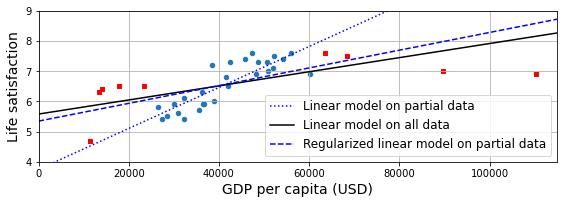

In [ ]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

save_fig('ridge_model_plot')
plt.show()

# Exercise Solutions

1. Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
2. Machine Learning is great for complex problems for which we have no algorithmic solution, to replace long lists of hand-tuned rules, to build systems that adapt to fluctuating environments, and finally to help humans learn (e.g., data mining).
3. A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.
4. The two most common supervised tasks are regression and classification.
5. Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.
6. Reinforcement Learning is likely to perform best if we want a robot to learn to walk in various unknown terrains, since this is typically the type of problem that Reinforcement Learning tackles. It might be possible to express the problem as a supervised or semi-supervised learning problem, but it would be less natural.
7. If you don't know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.
8. Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their labels (spam or not spam).
9. An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
10. Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer's main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
11. An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
12. A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
13. Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances. We usually train such systems by minimizing a cost function that measures how bad the system is at making predictions on the training data, plus a penalty for model complexity if the model is regularized. To make predictions, we feed the new instance's features into the model's prediction function, using the parameter values found by the learning algorithm.
14. Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
15. If a model performs great on the training data but generalizes poorly to new instances, the model is likely overfitting the training data (or we got extremely lucky on the training data). Possible solutions to overfitting are getting more data, simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularizing the model), or reducing the noise in the training data.
16. A test set is used to estimate the generalization error that a model will make on new instances, before the model is launched in production.
17. A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
18. The train-dev set is used when there is a risk of mismatch between the training data and the data used in the validation and test datasets (which should always be as close as possible to the data used once the model is in production). The train-dev set is a part of the training set that's held out (the model is not trained on it). The model is trained on the rest of the training set, and evaluated on both the train-dev set and the validation set. If the model performs well on the training set but not on the train-dev set, then the model is likely overfitting the training set. If it performs well on both the training set and the train-dev set, but not on the validation set, then there is probably a significant data mismatch between the training data and the validation + test data, and you should try to improve the training data to make it look more like the validation + test data.
19. If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic (you may launch a model that performs worse than you expect).